In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

dataset = fetch_california_housing()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [2]:
dataset.data.shape

(20640, 8)

In [3]:
dataset.data[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [5]:
zero_img = dataset.data[0].reshape(2,4)
zero_img

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952],
       [ 322.        ,    2.55555556,   37.88      , -122.23      ]])

<Figure size 640x480 with 0 Axes>

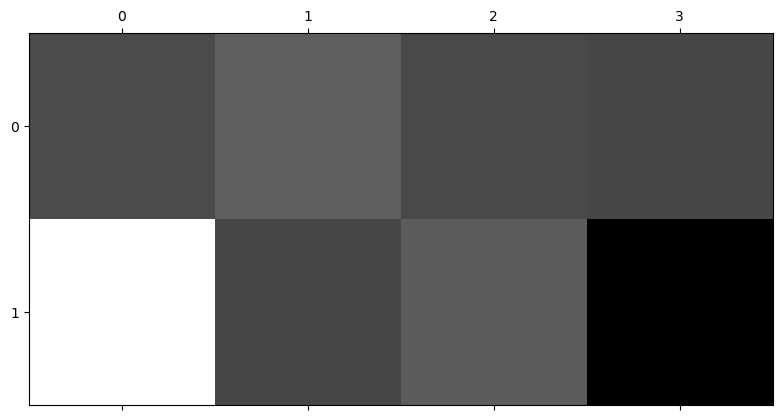

In [6]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(zero_img)
plt.show()

In [7]:
df = pd.DataFrame(dataset.data,
                  columns=dataset.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
dataset.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [9]:
X = df
y = dataset.target

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=30)


In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5882336691134316

# Using PCA

In [14]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(20640, 1)

In [15]:
pca.explained_variance_ratio_

array([0.99978933])

In [16]:
sum(pca.explained_variance_ratio_)

0.9997893267764066

In [17]:
pca.n_components_

1

In [18]:
X_pca

array([[-1103.51264821],
       [  975.54124441],
       [ -929.54990812],
       ...,
       [ -418.43757543],
       [ -684.43952537],
       [  -38.43624736]])

In [19]:
X_train_pca,X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [22]:
model = LinearRegression()
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

-0.001229714552937855

In [23]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [26]:
model_per = {'score':[], 'RS': [], 'Number_cols': []}

for i in range(1,8):
    for j in range(1,8):

        pca = PCA(n_components=i)
        X_pca = pca.fit_transform(X)

        X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=j)

        
        model = LinearRegression()
        model.fit(X_train_pca, y_train)
        score = model.score(X_test_pca, y_test)
        
        model_per['score'].append(score)
        model_per['RS'].append(j)
        model_per['Number_cols'].append(i)
        
        print(i,j)
        display(clear=True)

print('done')

done


In [27]:
model_df = pd.DataFrame(model_per)
model_df

,score,RS,Number_cols
0,-0.000715,1,1
1,-0.000205,2,1
2,0.000516,3,1
3,0.000330,4,1
4,0.000973,5,1
5,0.000722,6,1
6,-0.000756,7,1
7,0.008490,1,2
8,0.007713,2,2
9,0.010635,3,2


<Axes: >

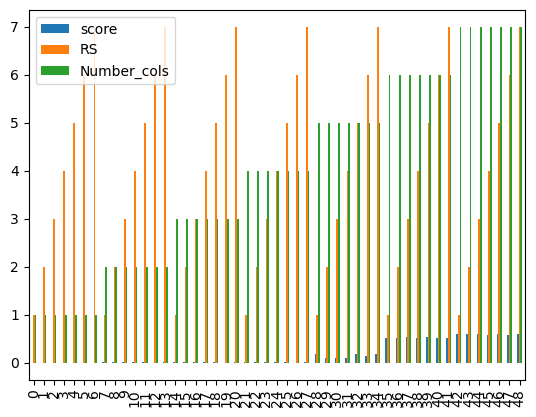

In [28]:
model_df.plot(kind = 'bar')

In [30]:
model_df[model_df['score'] == model_df['score'].max()]

,score,RS,Number_cols
46,0.606084,5,7


In [31]:
model_df.loc[4,'score']

0.0009734333828286257

In [32]:
model_df.loc[2]

score          0.000516
RS             3.000000
Number_cols    1.000000
Name: 2, dtype: float64

In [33]:
model_df.iloc[:,1]

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     1
8     2
9     3
10    4
11    5
12    6
13    7
14    1
15    2
16    3
17    4
18    5
19    6
20    7
21    1
22    2
23    3
24    4
25    5
26    6
27    7
28    1
29    2
30    3
31    4
32    5
33    6
34    7
35    1
36    2
37    3
38    4
39    5
40    6
41    7
42    1
43    2
44    3
45    4
46    5
47    6
48    7
Name: RS, dtype: int64

In [35]:
model_df.index

RangeIndex(start=0, stop=49, step=1)

In [36]:
model_df.index//2 == 0

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])